In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel(r"C:\Users\ali umar hasan\Desktop\data science\Dataset _assign_kmeans\csv's\EastWestAirlines (1).xlsx", sheet_name = "data")

In [3]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
df= df.rename(columns={'ID#':'ID', 'Award?':'Award'})

In [8]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist


In [10]:
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)
    
df_norm=norm_func(df.iloc[:,1:])

In [11]:
k=list(range(10,20))
k
TWSS=[]
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    WSS = [] 
    for j in range(i):
        WSS.append(sum(cdist(df_norm.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,df_norm.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))
TWSS

[array([785.37042769]),
 array([760.33332258]),
 array([750.20021861]),
 array([729.66893316]),
 array([719.26346534]),
 array([707.25273727]),
 array([689.81794481]),
 array([686.94392722]),
 array([678.72634824]),
 array([650.97973369])]

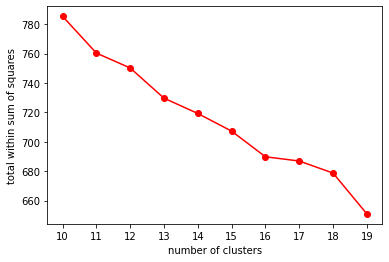

In [13]:
plt.plot(k,TWSS, 'ro-');plt.xlabel('number of clusters');plt.ylabel('total within sum of squares');plt.xticks(k)
plt.show()

In [14]:
model1=KMeans(n_clusters=14)
model1.fit(df_norm)

KMeans(n_clusters=14)

In [16]:
model1.cluster_centers_
model1.labels_
model=pd.Series(model1.labels_)
model
df['clust']=model


In [19]:
df_final=df.iloc[:,[12,0,1,2,3,4,5,6,7,8,9,10,11]]

fly=df.iloc[:,1:13].groupby(df_final.clust).mean()

df_final.to_csv("flightfinalkmewa.csv",encoding="utf-8")